In [124]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [125]:
gpu_data = pd.read_csv('gpu.csv', index_col=0)

(0.0018, 0.002)

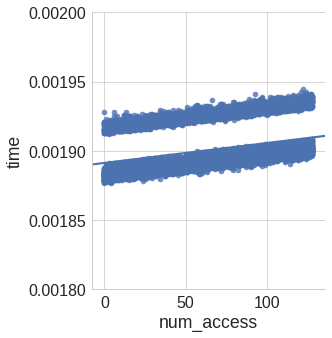

In [126]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(1.8e-3, 2e-3)

In [127]:
result = sm.ols(formula="time ~ num_access", data=gpu_data).fit()
result.params

Intercept     1.891186e-03
num_access    1.437675e-07
dtype: float64

### Conclusion
Each l2 access takes 140 cycle.

In [128]:
sim_data = pd.read_csv('sim.csv', index_col=0);sim_data

,benchmark,env,num_access,time
0,l2_read,sim,0,0.001856
1,l2_read,sim,16,0.001858
2,l2_read,sim,32,0.001861
3,l2_read,sim,48,0.001865
4,l2_read,sim,64,0.001868
5,l2_read,sim,80,0.001871
6,l2_read,sim,96,0.001874
7,l2_read,sim,112,0.001877
8,l2_read,sim,128,0.001880


In [129]:
full_data = gpu_data.append(sim_data, ignore_index=True)

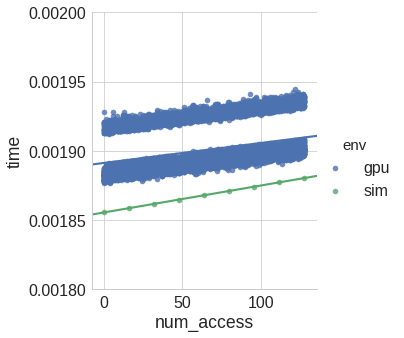

In [130]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env')
lm3.axes[0, 0].set_ylim(1.8e-3, 2.0e-3)
plt.savefig('l2_microbenchmark.pdf')

In [131]:
result = sm.ols(formula="time ~ num_access", data=sim_data).fit()
result.params

Intercept     1.855429e-03
num_access    1.941510e-07
dtype: float64

### Best configuration

DRAM latency 300
L2 latency 100 + 3(dir lookup)
L1 Latency 1
